gstiff
[[ 18900.  18900. -18900.  18900.      0.      0.]
 [ 18900.  25200. -18900.  12600.      0.      0.]
 [-18900. -18900.  37800.      0. -18900.  18900.]
 [ 18900.  12600.      0.  50400. -18900.  12600.]
 [     0.      0. -18900. -18900.  18900. -18900.]
 [     0.      0.  18900.  12600. -18900.  25200.]]
free displacements is [[-0.00092593]
 [-0.00019841]
 [ 0.00079365]]
All displacements is [[ 0.        ]
 [ 0.        ]
 [-0.00092593]
 [-0.00019841]
 [ 0.        ]
 [ 0.00079365]]
forces [[ 13.75]
 [ 15.  ]
 [-20.  ]
 [  0.  ]
 [  6.25]
 [  0.  ]]
reactions at 1st node
[[13.75]
 [15.  ]]
reactions at 3nd node
[6.25]
Shear force in 1st element is [13.75] 
Shear force in 2nd element is [13.75]-20 
SFD


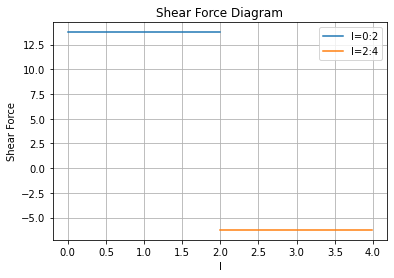

Bending moment in 1st element is -[15.]+[13.75]*x 
Bending moment in 2nd element is -[15.]+[13.75]*x-20*(x-2) 
BMD


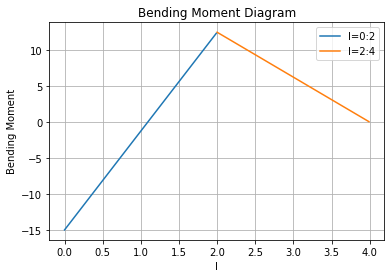

In [1]:
import numpy as np
import math as mt
ndcon= np.array([[1,2],[2,3]])
nelem = len(ndcon)
ndofn=2
nnode=2
x=[0,2,4]
E=2.1e8
I=6e-5
L=2
nodes=len(x)
tdofs=nodes*ndofn
gstiff = np.zeros([tdofs,tdofs])
ielem=0
while ielem < nelem: 
    gbdof=[]
    x1 =x[ndcon[ielem][0]-1]
    x2 =x[ndcon[ielem][1]-1]
    L=mt.sqrt((x2-x1)**2)
    K1 =np.matrix('%s, %s , %s, %s; %s, %s, %s, %s; %s, %s, %s, %s; %s, %s, %s, %s' % (12*E*I/L**3, 6*E*I/L**2,-12*E*I/L**3,6*E*I/L**2,6*E*I/L**2,4*E*I/L,-6*E*I/L**2,2*E*I/L,-12*E*I/L**3,-6*E*I/L**2,12*E*I/L**3,-6*E*I/L**2,6*E*I/L**2,2*E*I/L,-6*E*I/L**2,4*E*I/L))
    inode =0
    while inode < nnode:
        idofn=1
        while idofn <= ndofn:
            gbdof.append((ndcon[ielem,inode]-1)*ndofn+idofn)
            idofn += 1
        inode += 1
    i = 0
    if i == 0:
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1] + K1[0,0]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[0,1]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + K1[0,2]
        gstiff[gbdof[i]-1,gbdof[i+3]-1]=gstiff[gbdof[i]-1,gbdof[i+3]-1] + K1[0,3]
    i = 1
    if i == 1:
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[1,0]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + K1[1,1]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[1,2]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + K1[1,3]
    i = 2
    if i == 2:
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + K1[2,0]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[2,1]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + K1[2,2]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[2,3]
    i = 3 
    if i == 3:
        gstiff[gbdof[i]-1,gbdof[i-3]-1]=gstiff[gbdof[i]-1,gbdof[i-3]-1] + K1[3,0]
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + K1[3,1]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[3,2]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + K1[3,3]
    ielem += 1
print("gstiff")    
print(gstiff)
b=np.delete(gstiff,[0,1,4],0)
c=np.delete(b,[0,1,4],1)
f=np.matrix('-20;0;0')
u = np.linalg.inv(c).dot(f)
print("free displacements is %s" %u)
U=np.zeros([tdofs,1])
U[2][0]=u[0][0]
U[3][0]=u[1][0]
U[5][0]=u[2][0]
print("All displacements is %s" %U)
t= gstiff.dot(U)
print("forces %s" % t)
f= gstiff[0:2].dot(U)
print("reactions at 1st node")
print(f)
f2= gstiff[4].dot(U)
print("reactions at 3nd node")
print(f2)
#sfd for element
import matplotlib.pyplot as plt
w= np.arange(0,2,0.01)
x=f[0]+(0*w)
print("Shear force in 1st element is %s "%(f[0]))
y= np.arange(2,4,0.01)
z=f[0]-20+(0*w)
print("Shear force in 2nd element is %s-20 "%(f[0]))
print("SFD")
plt.plot(w,x,y,z)
plt.legend(['l=0:2', 'l=2:4'])
plt.xlabel('l')
plt.ylabel('Shear Force')
plt.title('Shear Force Diagram')
plt.grid(True)
plt.savefig('SFD_A2_Q1.png')
plt.show()

#Bmd for element
w= np.arange(0,2,0.01)
x=-f[1]+(f[0]*w)
print("Bending moment in 1st element is -%s+%s*x "%(f[1],f[0]))
y= np.arange(2,4,0.01)
z=-f[1]+(f[0]*(w+2))-(20*w)
print("Bending moment in 2nd element is -%s+%s*x-20*(x-2) "%(f[1],f[0]))
print("BMD")
plt.plot(w,x,y,z)
plt.legend(['l=0:2', 'l=2:4'])
plt.xlabel('l')
plt.ylabel('Bending Moment')
plt.title('Bending Moment Diagram')
plt.grid(True)
plt.savefig('BMD_A2_Q1.png')
plt.show()

